In [1]:
from IPython.display import display,HTML
def dhtml(st):
    display(HTML("""<style>
    @import url('https://fonts.googleapis.com/css?family=Roboto|Ewert&effect=3d');      
    </style><p class='font-effect-3d' onclick='setStyle(this,"#00ff66")'
    style='font-family:Roboto; font-size:25px; color:#ff355e;'>
    %s</p>"""%st+"""<script>
    function setStyle(element,c) {
     var docs=document.getElementsByClassName('font-effect-3d');
     for (var i=0; i<docs.length; i++) {
         docs[i].style='font-family:Ewert; font-size:22px;'; 
         docs[i].style.color=c;}; };
    </script>"""))
dhtml('Code Modules & Helpful Functions')

In [2]:
import numpy as np,pylab as pl,pandas as pd
import h5py,tensorflow as tf
import tensorflow_hub as th

In [3]:
def premodel(pixels,dense,mh,labels):
    model=tf.keras.Sequential([
        tf.keras.layers.Input((pixels,pixels,3),
                              name='input'),
        th.KerasLayer(mh,trainable=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(dense,activation='relu'),
        tf.keras.layers.Dropout(rate=.5),
        tf.keras.layers.Dense(labels,activation='softmax')])
    model.compile(optimizer='adam',metrics=['accuracy'],
                  loss='sparse_categorical_crossentropy')
    display(model.summary())
    return model
fw='weights.best.hdf5'
def cb(fw):
    early_stopping=tf.keras.callbacks\
    .EarlyStopping(monitor='val_loss',patience=20,verbose=2)
    checkpointer=tf.keras.callbacks\
    .ModelCheckpoint(filepath=fw,save_best_only=True,verbose=2)
    lr_reduction=tf.keras.callbacks\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]
def display_resize(x_train,x_valid,x_test,
                   y_valid,pixels):
    x_train=tf.image.resize(x_train,[pixels,pixels])
    x_valid=tf.image.resize(x_valid,[pixels,pixels])
    x_test=tf.image.resize(x_test,[pixels,pixels])
    img=x_valid[1]
    lbl='One example of resized images \nlabel: '+\
     str(y_valid[1][0])+'\nshape: '+str(img.shape)
    pl.imshow(img); pl.title(lbl)
    return [x_train,x_valid,x_test]

In [4]:
dhtml('Data Loading & Preprocessing')

In [5]:
fpath='../input/classification-of-handwritten-letters/'
f='LetterColorImages_123.h5'
f=h5py.File(fpath+f,'r')
keys=list(f.keys()); print(keys)
x=np.array(f[keys[1]],dtype='float32')/255
y=np.array(f[keys[2]],dtype='int32')\
.reshape(-1,1)-1
N=len(y); n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(23).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
x_test,x_valid,x_train=x[:n],x[n:2*n],x[2*n:]
y_test,y_valid,y_train=y[:n],y[n:2*n],y[2*n:]
x_valid.shape,y_valid.shape

['backgrounds', 'images', 'labels']


((1419, 32, 32, 3), (1419, 1))

In [6]:
dhtml('Pre-Trained Saved Models')

In [7]:
[handle_base,pixels]=["mobilenet_v2_050_96",96]
dhtml('#1 '+handle_base)
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

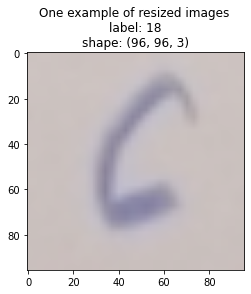

In [8]:
[x_train1,x_valid1,x_test1]=\
display_resize(x_train,x_valid,x_test,
               y_valid,pixels)

In [9]:
model=premodel(pixels,1024,mhandle,33)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              706224    
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 33)                33825     
Total params: 2,051,793
Trainable params: 2,033,249
Non-trainable params: 18,544
_________________________________________________________________


None

In [10]:
history=model.fit(x=x_train1,y=y_train,batch_size=64,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid1,y_valid))

Train on 11352 samples, validate on 1419 samples
Epoch 1/50
11328/11352 [============================>.] - ETA: 0s - loss: 1.2892 - accuracy: 0.6425
Epoch 00001: val_loss improved from inf to 1.21051, saving model to weights.best.hdf5
11352/11352 [==============================] - 19s 2ms/sample - loss: 1.2870 - accuracy: 0.6431 - val_loss: 1.2105 - val_accuracy: 0.6829
Epoch 2/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.4107 - accuracy: 0.8904
Epoch 00002: val_loss improved from 1.21051 to 0.59013, saving model to weights.best.hdf5
11352/11352 [==============================] - 9s 779us/sample - loss: 0.4113 - accuracy: 0.8903 - val_loss: 0.5901 - val_accuracy: 0.8619
Epoch 3/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.3032 - accuracy: 0.9219
Epoch 00003: val_loss improved from 0.59013 to 0.42970, saving model to weights.best.hdf5
11352/11352 [==============================] - 9s 783us/sample - loss: 0.3038 - accuracy: 0.9218 - val_loss:

In [11]:
model.load_weights(fw)
model.evaluate(x_test1,y_test)

1419/1419 [==============================] - 0s 287us/sample - loss: 0.1773 - accuracy: 0.9711


[0.17728023495659012, 0.9711064]

In [12]:
[handle_base,pixels]=["mobilenet_v2_075_96",96]
dhtml('#2 '+handle_base)
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

In [13]:
model=premodel(pixels,1024,mhandle,33)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              1382064   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 33)                33825     
Total params: 2,727,633
Trainable params: 2,700,993
Non-trainable params: 26,640
_________________________________________________________________


None

In [14]:
history=model.fit(x=x_train1,y=y_train,batch_size=64,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid1,y_valid))

Train on 11352 samples, validate on 1419 samples
Epoch 1/50
11328/11352 [============================>.] - ETA: 0s - loss: 1.2867 - accuracy: 0.6525
Epoch 00001: val_loss improved from inf to 1.61318, saving model to weights.best.hdf5
11352/11352 [==============================] - 19s 2ms/sample - loss: 1.2869 - accuracy: 0.6525 - val_loss: 1.6132 - val_accuracy: 0.7040
Epoch 2/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.4465 - accuracy: 0.8904
Epoch 00002: val_loss improved from 1.61318 to 0.58517, saving model to weights.best.hdf5
11352/11352 [==============================] - 12s 1ms/sample - loss: 0.4459 - accuracy: 0.8906 - val_loss: 0.5852 - val_accuracy: 0.8576
Epoch 3/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.3045 - accuracy: 0.9289
Epoch 00003: val_loss did not improve from 0.58517
11352/11352 [==============================] - 11s 934us/sample - loss: 0.3045 - accuracy: 0.9289 - val_loss: 0.7277 - val_accuracy: 0.8478
Epoch 4/

In [15]:
model.load_weights(fw)
model.evaluate(x_test1,y_test)

1419/1419 [==============================] - 1s 372us/sample - loss: 0.1732 - accuracy: 0.9760


[0.17316483703610594, 0.97603947]

In [16]:
[handle_base,pixels]=["mobilenet_v1_100_128",128]
dhtml('#3 '+handle_base)
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

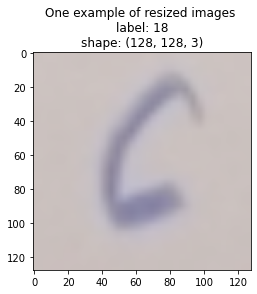

In [17]:
[x_train1,x_valid1,x_test1]=\
display_resize(x_train,x_valid,x_test,
               y_valid,pixels)

In [18]:
model=premodel(pixels,1024,mhandle,33)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1024)              3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 33)                33825     
Total params: 4,312,289
Trainable params: 4,290,401
Non-trainable params: 21,888
_________________________________________________________________


None

In [19]:
history=model.fit(x=x_train1,y=y_train,batch_size=64,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid1,y_valid))

Train on 11352 samples, validate on 1419 samples
Epoch 1/50
11328/11352 [============================>.] - ETA: 0s - loss: 1.2532 - accuracy: 0.6859
Epoch 00001: val_loss improved from inf to 0.88238, saving model to weights.best.hdf5
11352/11352 [==============================] - 22s 2ms/sample - loss: 1.2517 - accuracy: 0.6863 - val_loss: 0.8824 - val_accuracy: 0.7879
Epoch 2/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.3850 - accuracy: 0.9224
Epoch 00002: val_loss improved from 0.88238 to 0.58860, saving model to weights.best.hdf5
11352/11352 [==============================] - 17s 1ms/sample - loss: 0.3856 - accuracy: 0.9221 - val_loss: 0.5886 - val_accuracy: 0.8668
Epoch 3/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.3063 - accuracy: 0.9495
Epoch 00003: val_loss improved from 0.58860 to 0.42393, saving model to weights.best.hdf5
11352/11352 [==============================] - 17s 1ms/sample - loss: 0.3068 - accuracy: 0.9495 - val_loss: 0

In [20]:
model.load_weights(fw)
model.evaluate(x_test1,y_test)

1419/1419 [==============================] - 1s 434us/sample - loss: 0.1957 - accuracy: 0.9796


[0.1957087892044002, 0.97956306]

In [21]:
[handle_base,pixels]=["mobilenet_v2_050_128",128]
dhtml('#4 '+handle_base)
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

In [22]:
model=premodel(pixels,1024,mhandle,33)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              706224    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 33)                33825     
Total params: 2,051,793
Trainable params: 2,033,249
Non-trainable params: 18,544
_________________________________________________________________


None

In [23]:
history=model.fit(x=x_train1,y=y_train,batch_size=64,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid1,y_valid))

Train on 11352 samples, validate on 1419 samples
Epoch 1/50
11328/11352 [============================>.] - ETA: 0s - loss: 1.2589 - accuracy: 0.6462
Epoch 00001: val_loss improved from inf to 1.81691, saving model to weights.best.hdf5
11352/11352 [==============================] - 20s 2ms/sample - loss: 1.2578 - accuracy: 0.6464 - val_loss: 1.8169 - val_accuracy: 0.6385
Epoch 2/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.9017
Epoch 00002: val_loss improved from 1.81691 to 0.63443, saving model to weights.best.hdf5
11352/11352 [==============================] - 13s 1ms/sample - loss: 0.3692 - accuracy: 0.9019 - val_loss: 0.6344 - val_accuracy: 0.8450
Epoch 3/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.2429 - accuracy: 0.9371
Epoch 00003: val_loss did not improve from 0.63443
11352/11352 [==============================] - 13s 1ms/sample - loss: 0.2438 - accuracy: 0.9369 - val_loss: 0.7045 - val_accuracy: 0.8386
Epoch 4/50

In [24]:
model.load_weights(fw)
model.evaluate(x_test1,y_test)

1419/1419 [==============================] - 0s 351us/sample - loss: 0.1516 - accuracy: 0.9817


[0.15157389616130354, 0.98167723]